# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------- ------------------ 6.8/12.8 MB 41.7 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 40.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
!pip install charset-normalizer

In [3]:
!pip install chardet

In [4]:
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Importing the necessary libraries

In [5]:
!pip install plotly

In [6]:
import gensim.downloader as api

# This will automatically download (if not cached) and load the model
w2v_model = api.load("word2vec-google-news-300")

In [7]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [8]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [9]:
# Import the first file - True.csv
df_true = pd.read_csv("True.csv")

# Import the second file - Fake.csv
df_fake = pd.read_csv("Fake.csv")

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [10]:
# Inspect the DataFrame with True News to understand the given data
print("=== First 5 Rows of True News ===")
print(df_true.head())

=== First 5 Rows of True News ===
                                                                   title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [11]:
# Inspect the DataFrame with Fake News to understand the given data
print("\n=== First 5 Rows of Fake News ===")
print(df_fake.head())


=== First 5 Rows of Fake News ===
                                                                                        title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

                                                                                                                                                                                                                                                                                                                                                                                              

In [12]:
# Print the column details for True News DataFrame
print("=== True News DataFrame Info ===")
df_true.info()


=== True News DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [13]:
# Print the column details for Fake News Dataframe
print("\n=== Fake News DataFrame Info ===")
df_fake.info()


=== Fake News DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [14]:
# Print the column names of both DataFrames
print("\nColumns in True News:", df_true.columns.tolist())
print("Columns in Fake News:", df_fake.columns.tolist())


Columns in True News: ['title', 'text', 'date']
Columns in Fake News: ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [15]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
df_true['news_label'] = 1   # 1 for true news

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
df_fake['news_label'] = 0   # 0 for fake news

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [16]:
# Combine the true and fake news DataFrames into a single DataFrame
df_all = pd.concat([df_true, df_fake], ignore_index=True)

In [17]:
# Display the first 5 rows of the combined DataFrame to verify the result
print("=== Combined DataFrame Preview ===")
print(df_all.head())

=== Combined DataFrame Preview ===
                                                                   title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [18]:
df_all.shape

(44940, 4)

In [19]:
# Check Presence of Null Values
print("Null value counts:\n", df_all.isnull().sum())

Null value counts:
 title         21
text          21
date          42
news_label     0
dtype: int64


In [20]:
# Handle Rows with Null Values
df_all = df_all.dropna()

In [21]:
df_all.shape

(44898, 4)

In [22]:
# Check Presence of Null Values after drop
print("Null value counts:\n", df_all.isnull().sum())

Null value counts:
 title         0
text          0
date          0
news_label    0
dtype: int64


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [23]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space

# Combine 'title' and 'text' into a single column 'news_text'
df_all['news_text'] = df_all['title'].astype(str) + " " + df_all['text'].astype(str)


# Drop the irrelevant columns from the DataFrame as they are no longer needed

df_all.drop(columns=['title', 'text', 'date'], inplace=True)

# Reorder and keep only 'news_text' and 'news_label'
df_all = df_all[['news_text', 'news_label']]

# Display the first 5 rows of the updated DataFrame to check the result

print("=== Updated DataFrame ===")
print(df_all.head())

=== Updated DataFrame ===
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [24]:
df_all.shape

(44898, 2)

In [25]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 44939
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   news_text   44898 non-null  object
 1   news_label  44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [26]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed

df_clean = pd.DataFrame()

# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = df_all['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [27]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [28]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

df_clean['clean_text'] = df_all['news_text'].apply(clean_text)


print("=== Cleaned Text Preview ===")
print(df_clean[['clean_text']].head())


=== Cleaned Text Preview ===
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [29]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
# Download NLTK resources (only once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def lemmatize_nouns(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    
    # Keep only nouns (NN, NNS), remove stopwords, lemmatize
    nouns = [
        lemmatizer.lemmatize(word, pos='n')
        for word, tag in pos_tags
        if tag in ['NN', 'NNS'] and word not in stop_words
    ]
    
    return ' '.join(nouns)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kavitha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Kavitha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kavitha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Kavitha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kavitha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kavitha\AppData\

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [30]:
# Apply POS tagging and lemmatization function to cleaned text

# Store it in a separate column in the new DataFrame

df_clean['lemmatized_text'] = df_clean['clean_text'].apply(lemmatize_nouns)

In [31]:
# Preview both columns
print("=== Cleaned vs Lemmatized Text Preview ===")
print(df_clean[['clean_text', 'lemmatized_text']].head())

=== Cleaned vs Lemmatized Text Preview ===
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

### Save the Cleaned data as a csv file (Recommended)

In [32]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)

df_clean = pd.read_csv("clean_df.csv")

In [33]:
# Check the first few rows of the DataFrame
print("\n=== Cleaned Data Summary ===")
print(df_clean.head())


=== Cleaned Data Summary ===
   news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [34]:
# Check the dimensions of the DataFrame
print("\nShape:", df_clean.shape)


Shape: (44898, 3)


In [35]:
# Check the number of non-null entries and data types of each column
print("\nData Info:")
print(df_clean.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_label       44898 non-null  int64 
 1   clean_text       44889 non-null  object
 2   lemmatized_text  44889 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB
None


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [36]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data

from sklearn.model_selection import train_test_split

# Define feature and target columns
X = df_clean['lemmatized_text']
y = df_clean['news_label']

# Split the data: 70% training, 30% validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Combine back into DataFrames for ease of further processing
train_df = pd.DataFrame({'lemmatized_text': X_train, 'news_label': y_train})
val_df = pd.DataFrame({'lemmatized_text': X_val, 'news_label': y_val})

# Keep clean_text in train/val sets for analysis
train_df = train_df.merge(df_clean[['clean_text']], left_index=True, right_index=True)
val_df = val_df.merge(df_clean[['clean_text']], left_index=True, right_index=True)

# Display shapes
print("Training Data Shape:", train_df.shape)
print("Validation Data Shape:", val_df.shape)

# preview data
print("\n=== Training Sample ===")
print(train_df.head())

Training Data Shape: (31428, 3)
Validation Data Shape: (13470, 3)

=== Training Sample ===
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [37]:
# Add a new column to calculate the character length of cleaned news text

train_df['clean_text'] = train_df['clean_text'].fillna('')
train_df['clean_text_length'] = train_df['clean_text'].astype(str).apply(len)

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['lemmatized_text'] = train_df['lemmatized_text'].fillna('')
train_df['lemmatized_text_length'] = train_df['lemmatized_text'].apply(len)

In [38]:
print(train_df[['clean_text', 'lemmatized_text', 'clean_text_length', 'lemmatized_text_length']].head())

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

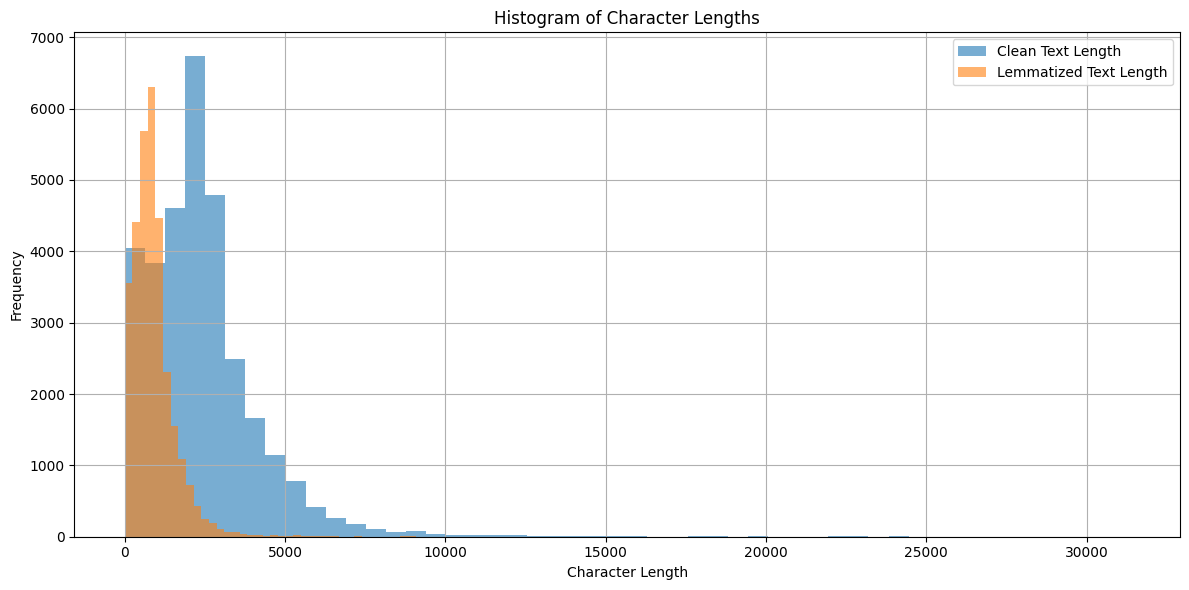

In [39]:
# Create a histogram plot to visualise character lengths

plt.figure(figsize=(12, 6))

# Add histogram for cleaned news text
plt.hist(train_df['clean_text_length'], bins=50, alpha=0.6, label='Clean Text Length')

# Add histogram for lemmatized news text with POS tags removed
plt.hist(train_df['lemmatized_text_length'], bins=50, alpha=0.6, label='Lemmatized Text Length')

plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.title("Histogram of Character Lengths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

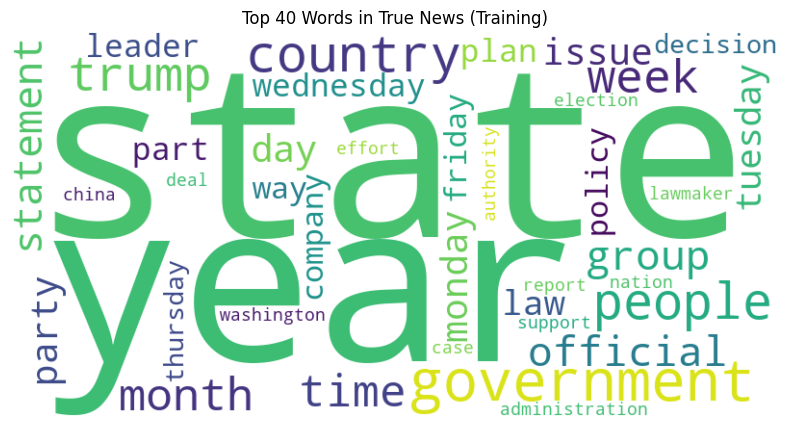

In [41]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

from wordcloud import WordCloud
from collections import Counter

# Filter news with label 1 (True News) and convert to it string and handle any non-string values

true_text = ' '.join(train_df[train_df['news_label'] == 1]['lemmatized_text'].dropna().astype(str))

# Generate WordCloud
wc_true = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(true_text)

    
# Plot WordCloud top 40 words
plt.figure(figsize=(10, 5))
plt.imshow(wc_true, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in True News (Training)")
plt.show()

In [42]:
# Get top 40 words in true news (by Frequency)

top_40_wc_true_df = sorted(wc_true.words_.items(), key=lambda x: x[1], reverse=True)
pd.DataFrame(top_40_wc_true_df, columns=["Word", "Relative Frequency"])

# Display the table
print("Top 40 Words in True News (by Frequency):")
display(top_40_wc_true_df)


Top 40 Words in True News (by Frequency):


[('state', 1.0),
 ('year', 0.9642634531477249),
 ('government', 0.9252025763557034),
 ('country', 0.7130687720756285),
 ('people', 0.6727612715562019),
 ('trump', 0.6260128817785166),
 ('week', 0.5873675462289633),
 ('month', 0.5539164762102639),
 ('time', 0.5248285892374818),
 ('official', 0.4646789943901932),
 ('group', 0.45917307292748805),
 ('statement', 0.434032827758155),
 ('day', 0.37855807188863494),
 ('monday', 0.35113234988572617),
 ('issue', 0.35009349677955537),
 ('party', 0.34728859339289425),
 ('tuesday', 0.3313941408684812),
 ('law', 0.31788905048826094),
 ('wednesday', 0.31487637648036565),
 ('plan', 0.3135258674423437),
 ('part', 0.3105131934344484),
 ('leader', 0.31009765219198004),
 ('policy', 0.29648867650114274),
 ('way', 0.29170995221275714),
 ('friday', 0.2893205900685643),
 ('company', 0.2844379804695616),
 ('decision', 0.27924371493870764),
 ('thursday', 0.2721795138167463),
 ('administration', 0.2685435279451486),
 ('effort', 0.266465821732807),
 ('case', 0.25

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [43]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_text = ' '.join(train_df[train_df['news_label'] == 0]['lemmatized_text'].dropna().astype(str))

# Generate word cloud for Fake News
wc_fake = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(fake_text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in Fake News (Training)")
plt.show()


In [44]:
# Get top 40 words in Fake news (by Frequency)

top_40_wc_fake_df = sorted(wc_fake.words_.items(), key=lambda x: x[1], reverse=True)
pd.DataFrame(top_40_wc_fake_df, columns=["Word", "Relative Frequency"])

# Display the table
print("Top 40 Words in Fake News (by Frequency):")
display(top_40_wc_fake_df)


Top 40 Words in Fake News (by Frequency):


[('trump', 1.0),
 ('people', 0.8485122358175751),
 ('time', 0.6178392658509455),
 ('year', 0.5280867630700778),
 ('president', 0.5005561735261401),
 ('state', 0.4665600667408231),
 ('way', 0.3861234705228031),
 ('clinton', 0.3789627363737486),
 ('country', 0.3642241379310345),
 ('day', 0.3460789766407119),
 ('woman', 0.3357202447163515),
 ('medium', 0.33516407119021135),
 ('thing', 0.3296718576195773),
 ('video', 0.3029060066740823),
 ('government', 0.292964404894327),
 ('house', 0.29199110122358174),
 ('fact', 0.2864293659621802),
 ('new', 0.2766963292547275),
 ('man', 0.2656423804226919),
 ('obama', 0.2396412680756396),
 ('week', 0.23540044493882092),
 ('america', 0.23373192436040044),
 ('party', 0.2324805339265851),
 ('group', 0.23081201334816462),
 ('report', 0.2303948832035595),
 ('statement', 0.2164210233592881),
 ('part', 0.2135706340378198),
 ('donald trump', 0.21218020022246942),
 ('world', 0.20661846496106787),
 ('case', 0.2025166852057842),
 ('american', 0.20189098998887653)

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [45]:
# Write a function to get the specified top n-grams

def get_top_ngrams(corpus, ngram_range=(1,1), n=None):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


In [46]:
# Function to display both table and plot
def display_ngrams_table_and_plot(ngram_data, title):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Convert n-gram data to DataFrame
    df = pd.DataFrame(ngram_data, columns=['N-gram', 'Frequency'])

    # Display table
    print(f"\n{title} (Table):")
    display(df)

    # Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Frequency', y='N-gram', data=df, palette='magma')
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("N-gram")
    plt.tight_layout()
    plt.show()



##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [47]:
# Handle NaN values in the text data
train_df['lemmatized_text'] = train_df['lemmatized_text'].fillna("")

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [48]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

# ---------- TRUE NEWS N-GRAMS ----------
true_corpus = train_df[train_df['news_label'] == 1]['lemmatized_text'].dropna()

# Unigrams
unigrams_true = get_top_ngrams(true_corpus, (1, 1), 10)
display_ngrams_table_and_plot(unigrams_true, "Top 10 Unigrams - True News")



Top 10 Unigrams - True News (Table):


N-gram  Frequency
0       trump      33434
1       state      25471
2   president      19238
3     reuters      16626
4  government      13963
5        year      13189
6       house      12943
7      people      10931
8       party      10490
9    election      10072

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [49]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


# Bigrams
bigrams_true = get_top_ngrams(true_corpus, (2, 2), 10)
display_ngrams_table_and_plot(bigrams_true, "Top 10 Bigrams - True News")




Top 10 Bigrams - True News (Table):


N-gram  Frequency
0          donald trump       2072
1          barack obama       1992
2    washington reuters       1965
3      president barack       1940
4       president trump       1880
5     reuters president       1799
6      president donald       1789
7       secretary state       1661
8  house representative       1627
9        trump campaign       1433

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [50]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

# Trigrams
trigrams_true = get_top_ngrams(true_corpus, (3, 3), 10)
display_ngrams_table_and_plot(trigrams_true, "Top 10 Trigrams - True News")



Top 10 Trigrams - True News (Table):


N-gram  Frequency
0        president barack obama       1749
1        president donald trump        797
2  washington reuters president        558
3       reuters president trump        547
4           secretary state rex        481
5      president vladimir putin        465
6           state rex tillerson        462
7             speaker paul ryan        368
8        leader mitch mcconnell        344
9      chancellor angela merkel        317

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>


Top 10 Unigrams - Fake News (Table):


N-gram  Frequency
0      trump      46879
1  president      18957
2     people      18319
3      state      14733
4    clinton      12589
5       time      12382
6       year      10295
7       news      10130
8      image       9834
9      obama       8560

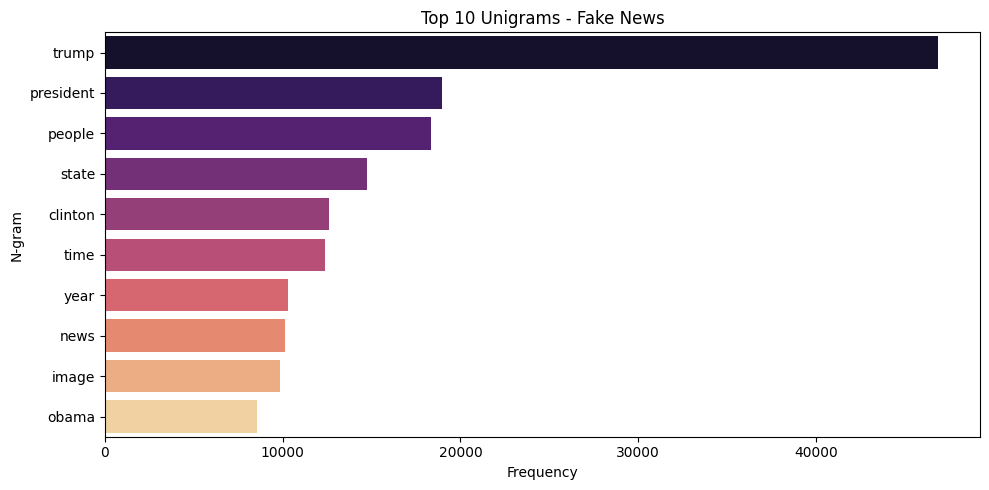

In [51]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph

# ---------- TRUE NEWS N-GRAMS ----------
fake_corpus = train_df[train_df['news_label'] == 0]['lemmatized_text'].dropna()

# Unigrams
unigrams_fake = get_top_ngrams(fake_corpus, (1, 1), 10)
display_ngrams_table_and_plot(unigrams_fake, "Top 10 Unigrams - Fake News")



##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>




Top 10 Bigrams - Fake News (Table):


N-gram  Frequency
0           donald trump       3679
1        president trump       2875
2        president obama       1852
3         trump campaign       1389
4        trump supporter       1314
5           century wire       1295
6           barack obama       1254
7       state department       1129
8        secretary state       1111
9  trump realdonaldtrump       1107

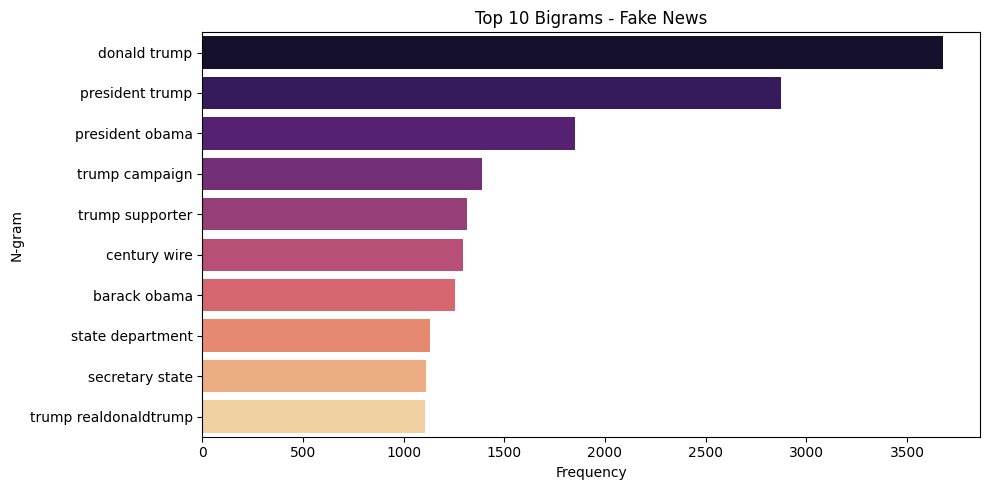

In [52]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
# Bigrams
bigrams_fake = get_top_ngrams(fake_corpus, (2, 2), 10)
display_ngrams_table_and_plot(bigrams_fake, "Top 10 Bigrams - Fake News")


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [53]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
# Trigrams
trigrams_fake = get_top_ngrams(fake_corpus, (3, 3), 10)
display_ngrams_table_and_plot(trigrams_fake, "Top 10 Trigrams - Fake News")


Top 10 Trigrams - Fake News (Table):


N-gram  Frequency
0             news century wire        626
1        president barack obama        524
2  donald trump realdonaldtrump        512
3            image video screen        436
4          video screen capture        411
5        president donald trump        225
6  department homeland security        202
7              image chip image        177
8         house press secretary        175
9       secretary state clinton        168

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [54]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [55]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [56]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [57]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [58]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [59]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [60]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [61]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [62]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [63]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [64]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [65]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [66]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"

import gensim.downloader as api

# Load the Google News Word2Vec model
print("Loading Word2Vec model... (this may take a few minutes)")
w2v_model = api.load("word2vec-google-news-300")
print("Model loaded!")

Loading Word2Vec model... (this may take a few minutes)
Model loaded!


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [67]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

# Funtion to get average vector for each document
def document_vector(text, model):
    words = text.split()
    word_vecs = [model[word] for word in words if word in model]
    if len(word_vecs) == 0:
        return np.zeros(300)  # Return a zero vector if no words are in the model
    else:
        return np.mean(word_vecs, axis=0)
        
## Extract the target variable for the training data and validation data

# Drop NaNs if any
train_df['lemmatized_text'] = train_df['lemmatized_text'].fillna('')
val_df['lemmatized_text'] = val_df['lemmatized_text'].fillna('')

# Vectorize training data
X_train_vectors = np.vstack(train_df['lemmatized_text'].apply(lambda x: document_vector(x, w2v_model)))
y_train = train_df['news_label'].values

# Vectorize validation data
X_val_vectors = np.vstack(val_df['lemmatized_text'].apply(lambda x: document_vector(x, w2v_model)))
y_val = val_df['news_label'].values

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [69]:
## Initialise Logistic Regression model

logreg_model = LogisticRegression(max_iter=1000)

## Train Logistic Regression model on training data
logreg_model.fit(X_train_vectors, y_train)

## Predict on validation data
y_pred_logreg = logreg_model.predict(X_val_vectors)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [70]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_pred_logreg))
print("Precision:", precision_score(y_val, y_pred_logreg))
print("Recall:", recall_score(y_val, y_pred_logreg))
print("F1 Score:", f1_score(y_val, y_pred_logreg))

Logistic Regression Evaluation:
Accuracy: 0.9321455085374907
Precision: 0.9232068806634925
Recall: 0.9355642023346303
F1 Score: 0.9293444650587508


In [71]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_pred_logreg))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      7045
           1       0.92      0.94      0.93      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [72]:
## Initialise Decision Tree model

dt_model = DecisionTreeClassifier()

## Train Decision Tree model on training data

dt_model.fit(X_train_vectors, y_train)

## Predict on validation data

y_pred_dt = dt_model.predict(X_val_vectors)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [73]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

print("Decision Tree Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_pred_dt))
print("Precision:", precision_score(y_val, y_pred_dt))
print("Recall:", recall_score(y_val, y_pred_dt))
print("F1 Score:", f1_score(y_val, y_pred_dt))


Decision Tree Evaluation:
Accuracy: 0.8452858203414997
Precision: 0.850250121026303
Recall: 0.8200778210116731
F1 Score: 0.8348914593566789


In [74]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_pred_dt))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      7045
           1       0.85      0.82      0.83      6425

    accuracy                           0.85     13470
   macro avg       0.85      0.84      0.84     13470
weighted avg       0.85      0.85      0.85     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [75]:
## Initialise Random Forest model
rf_model = RandomForestClassifier()

## Train Random Forest model on training data
rf_model.fit(X_train_vectors, y_train)

## Predict on validation data
y_pred_rf = rf_model.predict(X_val_vectors)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [76]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Precision:", precision_score(y_val, y_pred_rf))
print("Recall:", recall_score(y_val, y_pred_rf))
print("F1 Score:", f1_score(y_val, y_pred_rf))


Random Forest Evaluation:
Accuracy: 0.9291759465478842
Precision: 0.9353811873308929
Recall: 0.9147081712062257
F1 Score: 0.9249291784702549


In [77]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      7045
           1       0.94      0.91      0.92      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



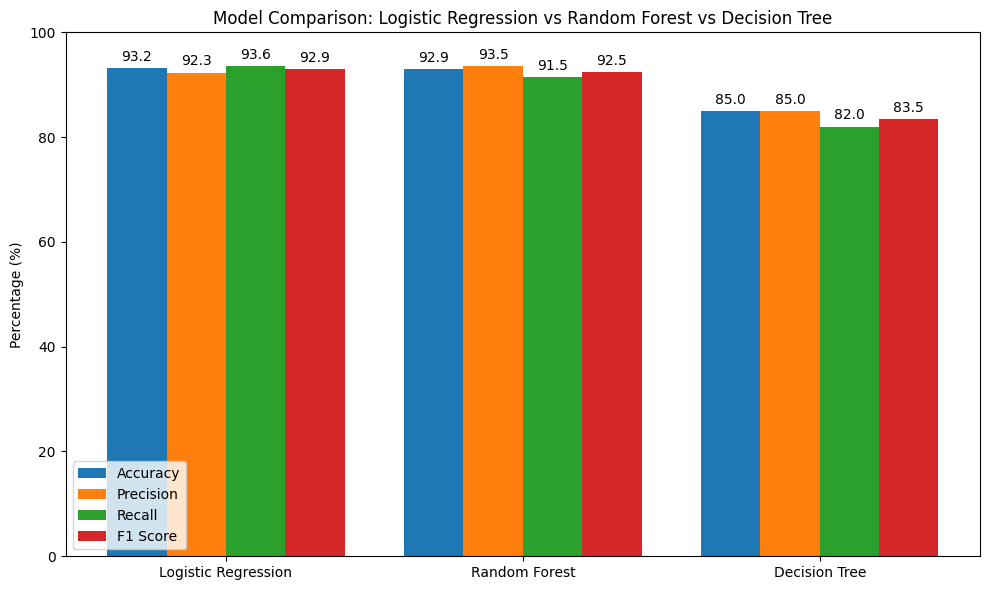

In [79]:
## Final Model Comparison Summary (Including Classification Reports)

import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']

# Metrics for each model
accuracy = [93.21, 92.92, 85.00]
precision = [92.32, 93.54, 85.03]
recall = [93.56, 91.47, 82.01]
f1_score = [92.93, 92.49, 83.49]

# Combine into a 2D array for plotting
metrics = np.array([accuracy, precision, recall, f1_score])

# Plotting
x = np.arange(len(models))
width = 0.2  # width of bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
bars2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
bars3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
bars4 = ax.bar(x + 1.5*width, f1_score, width, label='F1 Score')

# Labels and formatting
ax.set_ylabel('Percentage (%)')
ax.set_title('Model Comparison: Logistic Regression vs Random Forest vs Decision Tree')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 100)
ax.legend()
ax.bar_label(bars1, fmt='%.1f', padding=3)
ax.bar_label(bars2, fmt='%.1f', padding=3)
ax.bar_label(bars3, fmt='%.1f', padding=3)
ax.bar_label(bars4, fmt='%.1f', padding=3)

plt.tight_layout()
plt.show()

## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

## Patterns Observed in True vs Fake News:
	- Both true and fake news articles mostly consist of medium-length texts, which aligns with typical news article lengths.
	- Lemmatization likely helps the classifier focus on core semantic content by stripping morphological variation.
    - The right-skewed length distribution and preprocessing make the dataset suitable for text-based semantic classification without heavy bias from extremely long documents.

## Model Performance Overview:
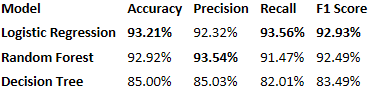

## Interpretation of Results:

   	• Logistic Regression:
   		○ Best overall performance with highest recall and balanced F1 score.
   		○ Strong at catching true positives (real fake news), meaning it misses fewer fake news articles.
   		○ Good precision ensures relatively few false alarms (false positives).
   		○ Consistent performance across both classes (fake and true news).
   	• Random Forest:
   		○ Very competitive with Logistic Regression.
   		○ Slightly better precision, implying fewer false positives.
   		○ Slightly lower recall, meaning it misses a few more true positives compared to Logistic Regression.
   		○ Robust and reliable model, beneficial when minimizing false accusations.
   	• Decision Tree:
   		○ Lower overall accuracy and F1 score.
   		○ Slightly better recall on fake news but poorer precision.
   		○ More interpretable but sacrifices performance.
   		○ Useful for explainability or baseline comparison.
    
 

## Semantic Classification Impact:

    	• Semantic classification using lemmatized text effectively reduces noise and redundancy, improving model focus on meaningful word stems and concepts, which is critical in distinguishing subtle differences between fake and true news text.
        
    	• The models trained on lemmatized texts achieved high accuracy and balanced metrics, demonstrating that semantic normalization enhances classification quality.
        
    	• Both Logistic Regression and Random Forest models leveraged this preprocessing step to deliver robust and reliable fake news detection.


##  Best Model Choice and Evaluation Metric:
### Chosen Model: Logistic Regression
		○ It offers the best recall (93.56%) and a balanced F1 score (92.93%), ensuring that most fake news instances are detected while maintaining low false positive rates.
        
		○ In fake news detection, recall is often prioritized to minimize the risk of letting fake news slip through undetected.
### Alternative Option: Random Forest
		○ If minimizing false positives is more important, Random Forest is an excellent alternative due to its higher precision.

##  Assessment and Impact
	• The combined approach of text preprocessing (cleaning + lemmatization) and semantic classification enables effective detection of fake news, with over 93% accuracy from top models.
    
	• This approach balances the need for sensitivity (recall) and specificity (precision), crucial for real-world applications in media and social platforms.
    
    • Logistic Regression’s interpretability and solid performance make it a practical choice for deployment in monitoring and flagging fake news content.